# Explore here

In [1]:
import cv2
import matplotlib.pyplot as plt  

#Funcion para cargar imagenes 

def cargar_imagen(animal, fuente):
    mascota = []
    fig, axes = plt.subplots(3, 3, figsize=(10, 10)) 
    axes = axes.flatten()  

    for i, ax in enumerate(axes): 
        imagen_nombre = animal + "." + str(i) + ".jpg"
        mascota.append(imagen_nombre)
        ruta_imagen = fuente + imagen_nombre

        img = cv2.imread(ruta_imagen)
    
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        ax.imshow(img_rgb)
        ax.set_title(f'Imagen {i+1}')
     
    plt.tight_layout()
    plt.show()

    return mascota


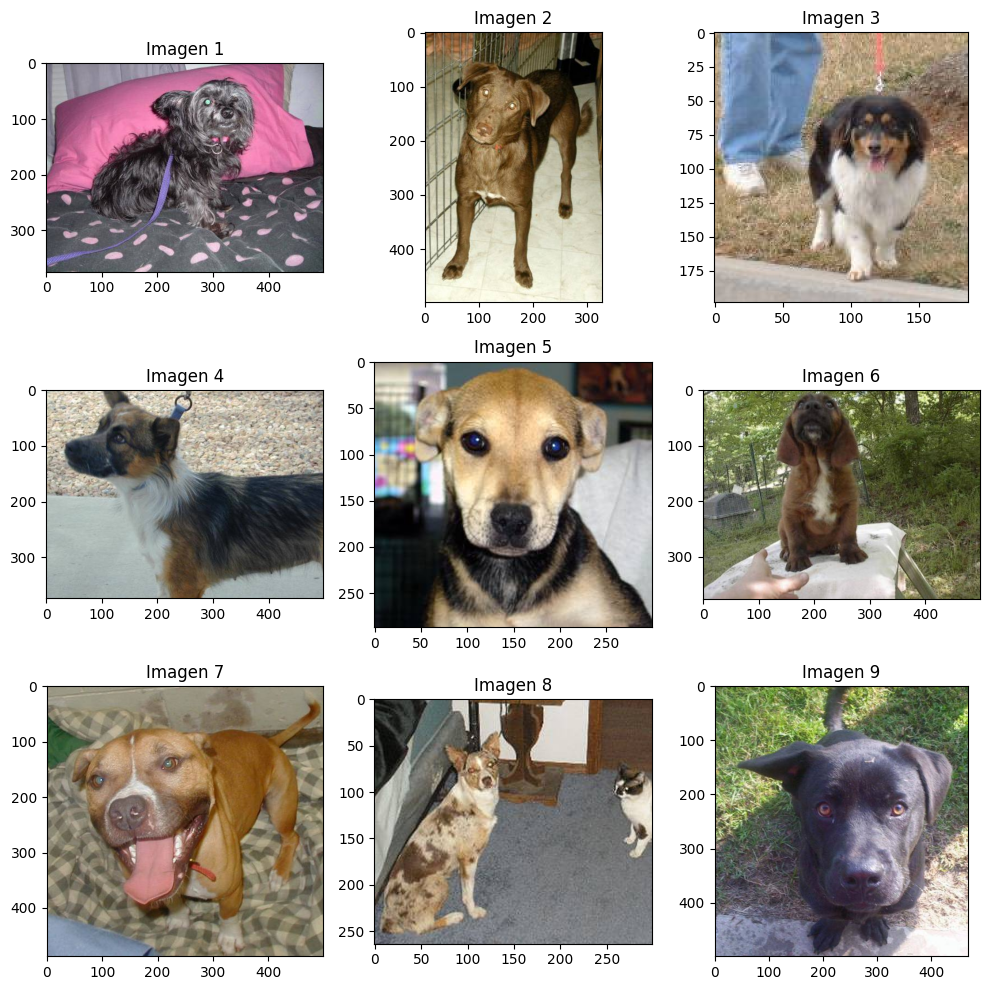

['dog.0.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg',
 'dog.6.jpg',
 'dog.7.jpg',
 'dog.8.jpg']

In [2]:
# Llamar a la función para perro 
cargar_imagen("dog", "/Users/eleinybellomanzo/Documents/DEEP-LEARNING/DEEP-LEARNING-1/data/processed/train/")

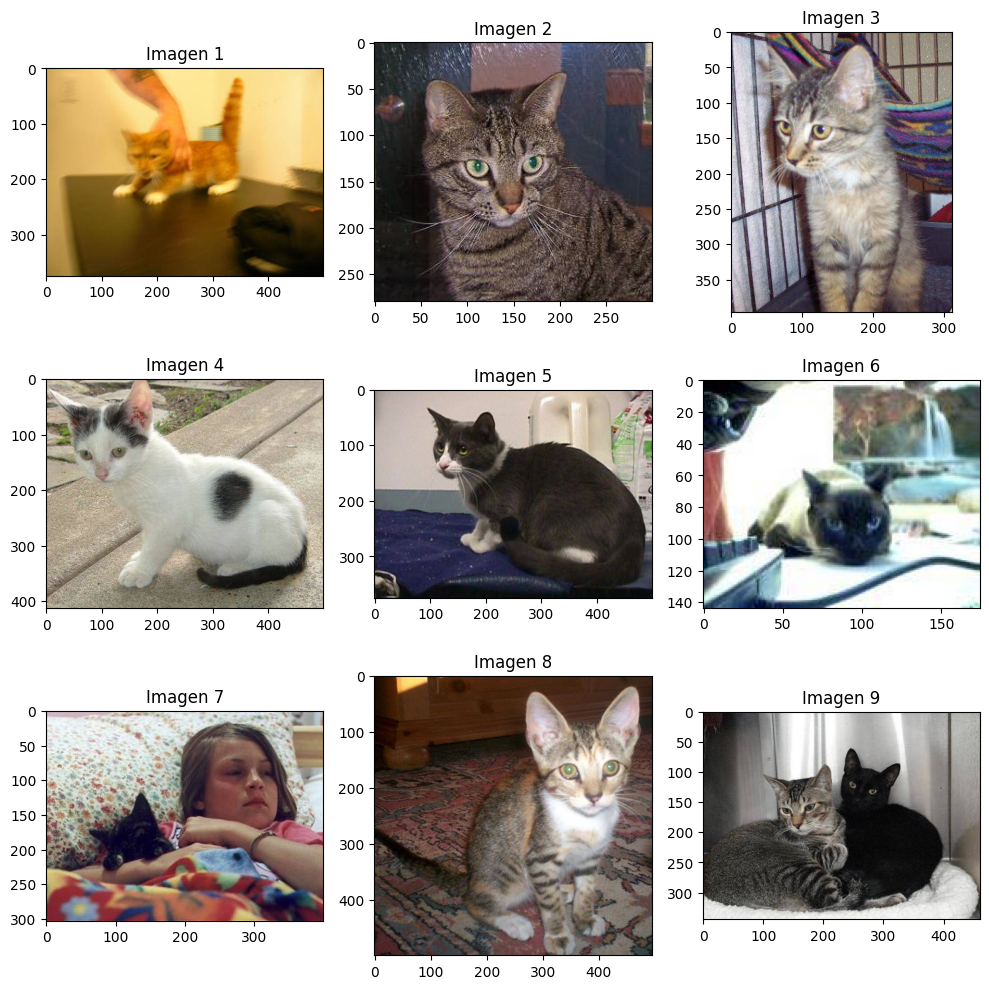

['cat.0.jpg',
 'cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg']

In [3]:
# Llamar a la función para gato
cargar_imagen("cat", "/Users/eleinybellomanzo/Documents/DEEP-LEARNING/DEEP-LEARNING-1/data/processed/train/")

In [14]:
# datos de train y test 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/Users/eleinybellomanzo/Documents/DEEP-LEARNING/DEEP-LEARNING-1/data/train'
test_dir = '/Users/eleinybellomanzo/Documents/DEEP-LEARNING/DEEP-LEARNING-1/data/test1'
image_size = (200, 200)

# Configuración de los generadores de datos
datagentrain = ImageDataGenerator(rescale=1.0/255.0)
datagentest = ImageDataGenerator(rescale=1.0/255.0)

# Cargando los datos de entrenamiento
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='binary'  # Cambia a 'categorical' si tienes más de 2 clases
)

# Cargando los datos de prueba
test_data = datagentest.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode=None,  # Si las imágenes de prueba no están clasificadas
    shuffle=False     # Para mantener el orden
)




Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [5]:
print("Número de imágenes en entrenamiento:", train_data.n)

Número de imágenes en entrenamiento: 0


In [6]:
train_data

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

model = Sequential()
model.add(Conv2D(input_shape = (224,224,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

/Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilar el modelo antes del entrenamiento

from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [9]:
# Ajustar el modelo de keras en el conjunto de datos
model.fit(train_data, epochs = 20)

/Users/eleinybellomanzo/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: The PyDataset has length 0